## Inicialización

Primero cargamos las todas las librerías que vamos a necesitar en el proyecto.

In [1]:
# Cargamos todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st 
from scipy.stats import levene

## Cargar datos

Cargamos nuestro DataFrame para hacer el primer análisis.

In [2]:
# Cargamos los datos
games = pd.read_csv('/datasets/games.csv')

## Exploracion de datos iniciales

El dataset contiene los siguientes campos:

- Name - (Nombre)
- Platform - (Plataforma)
- Year_of_Release - (Año de lanzamiento)
- Genre - (Género)
- NA_sales - (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales - (ventas en Europa en millones de dólares estadounidenses)
- JP_sales - (ventas en Japón en millones de dólares estadounidenses)
- Other_sales - (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score - (máximo de 100)
- User_Score - (máximo de 10)
- Clasificación - (ESRB)

Vamos a iniciar con un análisis general de la tabla para poder tener una idea de los datos con los que estamos trabajando. 

In [3]:
# Imprimimos la información general de la tabla
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprimimos un .describe()
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# Tenemos valores duplicados en la tabla?
games.duplicated().sum()

0

In [6]:
# Imprimimos una muestra de los datos
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Observaciones Iniciales**

En nuestra revisión general de los datos de nuestra tabla podemos observar lo siguiente:

- Todos los nombres de nuestras columnas están en mayúsculas. Vamos a cambiar los nombres a minúsculas. 
- Tenemos valores ausentes en las columnas `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, y `rating`.
- El Dtype de la columna `year_of_release` es float y podríamos cambiarla a datetime. 
- El Dtype de la columna `user_core ` es object y podríamos cambiarla a float ya que es un número. 
- En la columna `year_of_release` tenemos datos desde el ao 1980 hasta el 2016.
- En la columna `na_sales` tenemos valores desde 0 hasta 41.36 millones de dólares. 
- En la columna `eu_sales ` tenemos valores desde 0 hasta 28.96 millones de dólares. 
- En la columna `jp_sales` tenemos valores desde 0 hasta 10.22 millones de dólares. 
- En la columna `other_sales` tenemos valores desde 0 hasta 10.57 millones de dólares. 
- En la columna `critic_score ` tenemos valores desde 13 hasta 98. 
- No tenemos valores duplicados en la tabla en general


## Preparar los datos

En esta sección vamos a preparar nuestros datos antes de realizar el análisis. Vamos a tomar cada columna y analizar la razón de valores ausentes, valores atípicos, valores duplicados, y tomar dediciones para dejar nuestros datos listos para el análisis. 

In [7]:
# Primero cambamos los nombres de nuestra tabla a minúsculas. 
games.columns = games.columns.str.lower()

# Comprobamos
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### `name`

Vamos a iniciar analizando nuestra columna `name`. En nuestro análisis general vimos que tenemos valores ausentes en esta columna. Vamos ver estas columnas e intentar decidir cómo resolver este problema. Además, analizaremos posibles datos duplicados y qué hacer con ellos. 

#### Valores Ausentes

In [8]:
# Imprimimos las columnas con los valores ausentes

games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Porcentage de valores ausentes en la columna name

'{:.2%}'.format(len(games[games['name'].isna()])/len(games))

'0.01%'

In [10]:
# Uso el género y año de lanzamiento para filtrar una tabla

games[(games['year_of_release'] == 1993) & (games['platform'] == 'GEN')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Eliminaos las filas con valores nulos
games.dropna(subset=['name'],inplace=True)

# Comprobamos
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Conclusiones**

Vimos que solo tenemos dos filas con valores ausentes en esta columna. El porcentaje de estos era de un 1%, lo cual es poco. Vimos que en estas dos columnas no solo faltaban los nombres si no también información del género, rating, y score. Utilizamos la información de `platform` y `year_of_release` para segmentar una tabla con información que pudiésemos utilizar. Sin embargo, no obtuvimos ningún resultado. Ya que faltaban algunos datos en estas filas y no podríamos simplemente agregar datos al azar, decimos deshacernos de estas dos filas. 

#### Duplicados

In [12]:
# Buscamos valores ausentes 

games['name'].duplicated().sum()

5154

In [13]:
# Porcentaje de valores duplicados 

'{:.2%}'.format(games['name'].duplicated().sum()/len(games))

'30.84%'

In [14]:
# Cuantos valores únicos tenemos? 

len(games['name'].unique())

11559

In [15]:
# Tratamos corregir los valores ausentes al cambiar todo a minúsculas

games['name'] = games['name'].str.lower()

# Comprobamos si logramos reducir el número

len(games['name'].unique())

11559

In [16]:
# Imprimimos una tabla con los valores duplicados para analizar

games[games['name'].duplicated()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,grand theft auto v,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,call of duty: black ops ii,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,call of duty: modern warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,call of duty: black ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,grand theft auto v,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
55,call of duty: modern warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M
57,grand theft auto iv,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
59,super mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
69,call of duty: ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M
99,call of duty: black ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN


In [17]:
# Filtramos una tabla para uno de los valores duplicados 

games[games['name'] == 'grand theft auto v']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,grand theft auto v,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,grand theft auto v,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,grand theft auto v,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,grand theft auto v,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,grand theft auto v,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


**Conclusiones**

En efecto, tenemos valores duplicados en esta columna. El porcentaje total de valores duplicados nos dio un total de 30.84% lo cual es un valor alto. Intentamos convertir todos los valores a minúscula en caso de que este sea un problema de tener tantos duplicados. Sin embargo, esto no logro disminuir en nada los valores duplicados. 

Imprimimos una tabla de valores duplicados y nos dimos cuenta que la razón de los duplicados en esta columna se debe a que cada nombre de juego está relacionado con una plataforma diferente. En si es el mismo juego, pero con los resultados obtenidos de esa plataforma. Esto quiere decir que a pesar de ser el mismo juego tenemos cantidad de ventas diferentes y esto nos servirá para nuestro análisis. Por esta razón no eliminaremos valores duplicados. Lo dejaremos tal como está. 


### `platform`

De nuestro análisis general vimos que en esta columna no tenemos valores ausentes. Por esto, solo buscaremos valores duplicados y en el caso de encontrarlos decidiremos como trabajarlos. 

#### Duplicados

In [18]:
# Vemos si tenemos valores duplicados

games['platform'].duplicated().sum()

16682

In [19]:
# Imprimimos un .unique()

games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
len(games['platform'].unique())

31

**Conclusiones**

Vemos que al buscar duplicados el resultado es positivo. Sin embargo, los valores duplicados en esta columna son iguales que los valores duplicados en `name`. El nombre de cada consola se va a repetir varias veces ya que va a ver varios juegos que se usen en esa consola. Por lo tanto, no vamos a hacer nada con estos valores. De hecho, al ver nuestro unique podemos ver que el nombre de cada consola no se llega a repetir. 

### `year_of_release`

En nuestro análisis general ya vimos que tenemos valores ausentes en esta columna. Ahora vamos a investigar un poco la razón de estos valores y tomar decisiones. También buscaremos valores atípicos, valores duplicado, y buscaremos como corregirlos. 

#### Valores Ausentes

In [21]:
# Imprimimos una tabla con valores ausentes

games[games['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [22]:
# Averiguamos la cantidad de valores ausentes que tenemos

len(games[games['year_of_release'].isna()])

269

In [23]:
# Averiguamos el porcentaje de valores ausentes

'{:.2%}'.format(len(games[games['year_of_release'].isna()])/len(games))

'1.61%'

In [24]:
# Analizamos nuestros valores ausentes

games[games['name'] == 'madden nfl 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [25]:
games[games['name'] == 'lego batman: the videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


**Conclusiones intermedias**

Podemos ver que el porcentaje de valores ausentes no es tan elevado. Tenemos un 1.61% de valores ausentes en esta columna. De la tabla de valores ausentes he tomado los nombres de dos video juegos y he filtrado tablas para cada uno de ellos y podemos ver que los juegos si tienen su año de lanzamiento en otras plataformas. 

Tomando esto podríamos agrupar nuestros datos por nombre y obtener la mediana de año de lanzamiento y así con una función poder agregar a los valores ausentes de esta columna.  


In [26]:
# Creamos una tabla con la informacion que necesitamos

year_mode = games.pivot_table(index='name',values='year_of_release',aggfunc='median')
year_mode

,year_of_release
name,
beyblade burst,2016.0
fire emblem fates,2015.0
frozen: olaf's quest,2013.0
haikyu!! cross team match!,2016.0
tales of xillia 2,2012.0
...,...
zumba fitness rush,2012.0
zumba fitness: world party,2013.0
zwei!!,2008.0


In [27]:
# Creamos una funcion que nos ayudara mas adelante a replazar valores

def replace(row,column_1,column_2,new_df, column_3 = None):
    missing = row[column_1]
    new_value = row[column_2]

    if column_3 != None:
        addtional = row[column_3]
        if pd.isna(missing):
            try:
                return new_df[column_1][addtional][new_value]
            except:
                return None
        else:
            return missing

    else:
        if pd.isna(missing):
            try:
                return new_df[column_1][new_value]
            except:
                return None
        else:
            return missing

In [28]:
# Probamos la funcion

print(replace(games.iloc[183],'year_of_release','name',year_mode))
print(replace(games.iloc[456],'year_of_release','name',year_mode))
print(replace(games.iloc[609],'year_of_release','name',year_mode))


2003.0
2008.0
1999.0


In [29]:
# Aplicamos la funcion a nuestra tabla

games['year_of_release'] = games.apply(replace,args=('year_of_release','name',year_mode),axis=1)

# Comprobamos

len(games[games['year_of_release'].isna()])

146

In [30]:
# Porcentaje nuevo de valores ausentes

'{:.2%}'.format(len(games[games['year_of_release'].isna()])/len(games))

'0.87%'

In [31]:
# Nueva tabla de valores ausentes en esta columna

games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,rock band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,rock band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,rock band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,homeworld remastered collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,agarest senki: re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [32]:
games[games['name'] == 'virtua quest']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15754,virtua quest,PS2,NaN,Role-Playing,0.01,0.01,0.0,0.0,53.0,7.6,T
16522,virtua quest,GC,NaN,Role-Playing,0.01,0.00,0.0,0.0,55.0,5.5,T


**Conclusiones**

A pesar de haber logrado disminuir nuestro número de valores ausentes en esta columna aún nos quedan unos cuantos. La razón es que estos juegos no tienen su año de lanzamiento en ninguna consola y por eso nuestra función para remplazar valores no funciona. Ahora nuestro porcentaje de valores ausentes en esta columna es solo de 0.87%. Este valor es bastante bajo y podríamos simplemente eliminar estos valores. Sin embargo, no lo haremos ya que el resto de datos de estas columnas si nos pueden ser útiles en el análisis posterior. 

#### Valores Atípicos

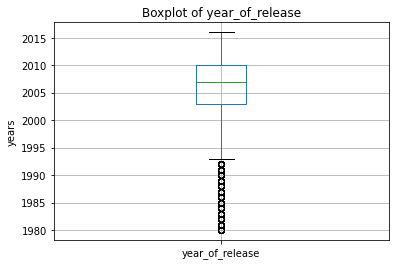

count    16567.000000
mean      2006.490403
std          5.862637
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [33]:
# Imprimimos un boxplot y un describe para analizar los valores de esta columna

games.boxplot('year_of_release')
plt.title('Boxplot of year_of_release')
plt.ylabel('years')
plt.show()
games['year_of_release'].describe()


In [34]:
# Cantidad de valores menores a 1997

len(games[games['year_of_release'] <= 1997])

1257

In [35]:
# Porcentaje de valores menores a 1997

'{:.2%}'.format(len(games[games['year_of_release'] <= 1997])/len(games['year_of_release']))

'7.52%'

**Conclusiones**

Tomando nuestro describe y nuestro diagrama de caja podríamos decir que nuestros datos de `year_of_release` están sesgados hacia la izquierda. Podemos ver que nuestro bigote inferior del diagrama de caja esta alrededor de 1997. Por esto podríamos decir que nuestros valores atípicos se encuentran por debajo de 1997. Hemos sacado un porcentaje de estos valores y vemos que tenemos un 7.52% de valores por debajo de 1997. 

Más adelante tomaremos una decisión de con que años trabajar para nuestro análisis y en ese momento talvez volvamos a analizar este diagrama y tomar una decisión. 


### `genre`


En nuestro análisis general vimos que en esta columna también teníamos valores ausentes. Sin embargo, los valores ausentes fueron eliminados al mismo tiempo que eliminamos los valores ausentes de la columna `name`. Entonces solo vamos a analizar posibles valores duplicados.  


#### Duplicados

In [36]:
# Buscamos los valores unicos 

games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [37]:
# Buscamos valores duplicados

len(games['genre'].duplicated())

16713

**Conclusiones**

Podemos ver que tenemos 12 valores únicos en esta columna y ninguno necesita ser modificado. Tambien vemos que si tenemos valores unicos pero este es el mismo caso que en las otras columnas; entonces no haremos nada al respecto. 

### `na_sales`

En nuestro análisis general vimos que en esta columna no teníamos valores ausentes. Por lo tanto, no tenemos que analizar esto. Sin embargo, vamos analizar la distribución de nuestros datos en esta columna para buscar valores atípicos. 

#### Valores Atípicos

In [38]:
# Creamos una fórmula que nos ayudara en nuestro análisis de valores atípicos en distintas columnas

def outliers(df,col,ylabel):
    df.boxplot(col,figsize=(8,5))
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'El IQR de {col} es {IQR}')
    print()

    if low_limit < 0:
        print(f'La cantidad de valores iguales o menores a {min} es {values_0}')
        print()
        print(f'El porcentaje de valores iguales o menores a {min} es {percentage_values_0}')
    else:
        print(f'La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}')
        print()
        print(f'El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}')

    print()
    print(f'EL limite superior es de nuestro boxplot es {up_limit}')
    print()
    print(f'La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}')
    print()
    print(f'Elporcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}')

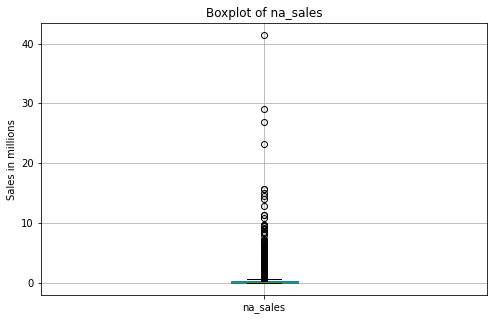

count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

El IQR de na_sales es 0.24

La cantidad de valores iguales o menores a 0.0 es 4507

El porcentaje de valores iguales o menores a 0.0 es 26.97%

EL limite superior es de nuestro boxplot es 0.48

La cantidad de volores iguales o superiores a 0.48 es 2182

Elporcentaje de valores iguales o superiores a 0.48 es 13.06%


In [39]:
# Aplicamos la función a nuestra columna

outliers(games,'na_sales','Sales in millions')

**Conclusiones**

Aquí podemos ver que la gran mayoría de valores se encuentran entre 0 y 0.48 millones. Al ver el grafico de cajas no es tan fácil ver esto y por esta razón buscamos el límite superior de nuestro grafico para poder entenderlo mejor. Y siendo nuestro límite superior 0.48 podemos decir que la mayoría de los datos se encuentran en ese rango. De hecho, podemos ver que la cantidad de valores iguales o superiores a 0.48 son de un 13.06% de todos nuestros datos en esta columna. Podríamos decir que estos son datos atípicos; sin embargo, no los vamos a eliminar ni modificar. Ya que estos valores nos ayudaran en nuestro análisis más tarde. 

### `eu_sales`

Al igual que la columna anterior, sabemos que no tenemos valores nulos. Entonces nos enfocaremos en los valores atípicos. 

#### Valores Atípicos

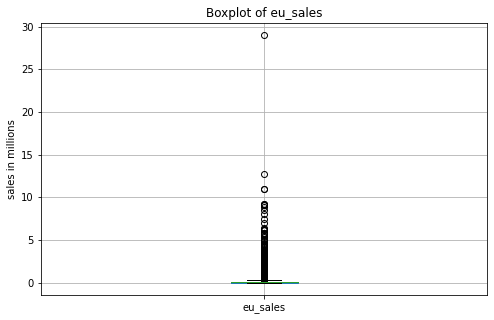

count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

El IQR de eu_sales es 0.11

La cantidad de valores iguales o menores a 0.0 es 5869

El porcentaje de valores iguales o menores a 0.0 es 35.12%

EL limite superior es de nuestro boxplot es 0.22

La cantidad de volores iguales o superiores a 0.22 es 2539

Elporcentaje de valores iguales o superiores a 0.22 es 15.19%


In [40]:
# Aplicamos la función a nuestra columna

outliers(games,'eu_sales','sales in millions')

**Conclusiones**

Al igual que en nuestra columna `na_sales` aquí también vemos que la mayoría de los valores están entre 0 y 0.22 millones. Ya que la mayoría se encuentra entre estos valores, pero aun así tenemos una buena cantidad de valores superiores es que nuestra caja se ve muy aplastada en nuestro gráfico. Podríamos decir que los valores superiores a los 0.22 millones son valores atípicos; sin embargo, tampoco haremos modificaciones en esta columna por ahora. 

### `jp_sales`

En esta columna tampoco tenemos valores ausentes. Continuaremos con el análisis de valores atípicos. 

#### Valores Atípicos

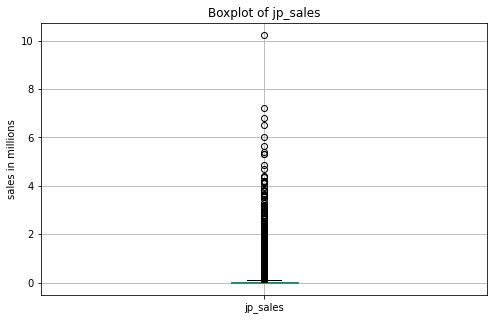

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

El IQR de jp_sales es 0.04

La cantidad de valores iguales o menores a 0.0 es 10513

El porcentaje de valores iguales o menores a 0.0 es 62.90%

EL limite superior es de nuestro boxplot es 0.08

La cantidad de volores iguales o superiores a 0.08 es 2965

Elporcentaje de valores iguales o superiores a 0.08 es 17.74%


In [41]:
# Aplicamos la función a nuestra columna

outliers(games,'jp_sales','sales in millions')

**Conclusiones**

Nuevamente podemos ver un gráfico similar a los que hemos obtenido en las otras regiones de ventas. La mayoría de valores se concentra en un rango tan pequeño y los valores atípicos llegan tan alto que hacen que la figura se vea de esta manera. Algo adicional que podemos notar, es que a medida que hemos analizado cada región, la cantidad de números iguales o menores a 0 ha aumentado. En este caso, nuestro porcentaje de valores iguales o menores a 0 es de 62.90%, más de la mitad de nuestros datos. También vemos que nuestro límite superior es mucho menor al de la columna anterior con 0.08 millones. Igual que en las otras columnas podríamos decir que los valores superiores al límite superior, en este caso 0.08 millones son valores atípicos. Tampoco modificaremos estos valores. 

### `other_sales`

En esta columna tampoco tenemos valores ausentes. Continuaremos con el análisis de valores atípicos. 

#### Valores Atípicos

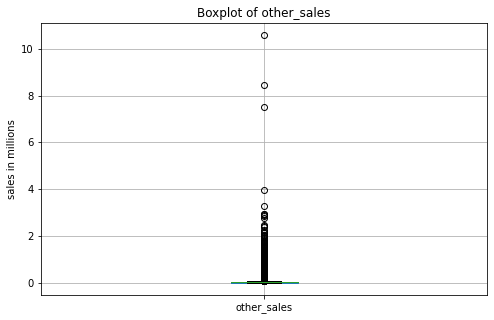

count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

El IQR de other_sales es 0.03

La cantidad de valores iguales o menores a 0.0 es 6600

El porcentaje de valores iguales o menores a 0.0 es 39.49%

EL limite superior es de nuestro boxplot es 0.06

La cantidad de volores iguales o superiores a 0.06 es 2974

Elporcentaje de valores iguales o superiores a 0.06 es 17.79%


In [42]:
# Aplicamos la función a nuestra columna

outliers(games,'other_sales','sales in millions')

**Conclusiones**

Una vez más obtenemos una distribución bastante similar al de las otras columnas de ventas. Tenemos la mayoría de nuestros datos entre 0 y 0.06 millones de dólares. El 17.79% de nuestros datos es mayor a nuestro límite superior de 0.06 millones de dólares. No vamos a hacer cambios ni modificaciones por el momento. 

### `critic_score`

De nuestro análisis genera inicial vimos que si tenemos valores ausentes en esta columna. Esto será lo primero que analizaremos y buscaremos maneras de solucionarlo. También buscaremos algún otro posible error que pueda tener la columna e intentaremos arreglarlo para nuestro análisis. 

#### Valores Ausentes

In [43]:
# Segmentamos una tabla con los valores ausentes de la columna

games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [44]:
# Cantidad de valores nulos

len(games[games['critic_score'].isna()])

8576

In [45]:
# Porcentake de valores nulos

'{:.2%}'.format(len(games[games['critic_score'].isna()])/len(games))

'51.31%'

Podemos ver que tenemos una gran cantidad de valores nulos en esta columna. Tenemos un 51.31% de valores ausentes. Esto podría afectar nuestro análisis mas adelante. Por esto vamos a buscar posibles maneras de solucionar el problema. 

Una manera en que solucionamos valores ausentes anteriormente fue agrupando por nombres de videojuegos. Si tuviéramos las calificaciones de los videojuegos en otras plataformas, podríamos tomar esas calificaciones y asignarlas a las plataformas que nos las tienen. Vamos a ver si esta solución es posible. 



In [46]:
# Buscamos juegos por nombre

games[games['name'] == 'spirits & spells']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15771,spirits & spells,GC,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN


In [47]:
# Buscamos otro ejemplo

games[games['name'] == 'lma manager 2007']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16711,lma manager 2007,X360,2006.0,Sports,0.0,0.01,0.0,0.0,NaN,NaN,NaN


In [48]:
# Buscamos un ejemplo adicional 

games[games['name'] == 'duck hunt']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Conclusiones**

Al parecer hacer la agrupación que queríamos para remplazar los valores ausentes no va a funcionar. Tomamos varios ejemplos y vemos que, aunque si tengamos nombres de juegos en diferentes plataformas, estos no tienen calificación en ninguna de las opciones. Y también tenemos juegos que no se repiten en otras plataformas. 

Asignar calificaciones por otros criterios es complicado ya que no sabemos el criterio de las calificaciones de los otros juegos. Por esta razón vamos a dejar los valores ausentes, pero vamos a cambiarlos por np.nan para que no nos llegue a afectar más adelante en nuestro análisis. 


In [49]:
# Remplazamos los valores nulos con np.nan

games['critic_score'].fillna(np.nan,inplace=True)

# Comprobamos el cambio

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



#### Valores Atípicos

Ahora analizaremos los valores atípicos de esta columna 

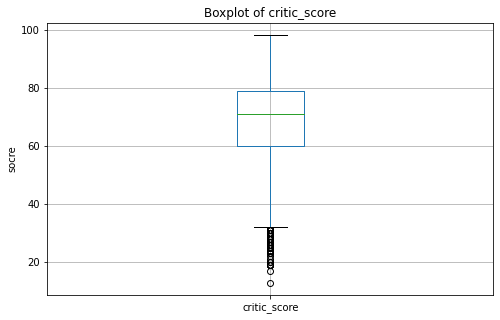

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

El IQR de critic_score es 19.0

La cantidad de valores iguales o menores a 41.0 es 339

El porcentaje de valores iguales o menores a 41.0 es 2.03%

EL limite superior es de nuestro boxplot es 98.0

La cantidad de volores iguales o superiores a 98.0 es 4

Elporcentaje de valores iguales o superiores a 98.0 es 0.02%


In [50]:
# Usamos nuestra funcion de outliers

outliers(games,'critic_score','socre')

**Conclusiones**

Podemos observar en nuestro diagrama de caja y nuestros otros resultados que la mayoría de nuestros se encuentra entre 41 y 98. Podríamos decir que los valores atípicos serían los valores menores a 41 y aquellos mayores a 98. Sin embargo, esto no es cierto ya que sabemos que el rango de calificación es de 0 a 100. Entonces no tenemos valores que se salgan de ese rango. Nuestro diagrama se ve así ya que la mayoría de valores están entre los valores ya mencionados y solo un 2.03% son menores de nuestro límite inferior y el 0.02% son mayores a nuestro límite superior. No vamos a hacer ninguna modificación por el momento. 

### `user_score`

De nuestro análisis general vimos que si tenemos valores ausentes en esta columna. Vamos a analizar la magnitud de valores ausentes y a tomar decisiones de cómo solucionar este problema. También analizaremos la distribución de esta columna para poder determinar si tenemos o no valores atípicos y si necesitamos hacer algo al respecto o no. 

#### Valores Ausentes

In [51]:
# Filtramos nuestros datos con los valores ausentes

games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [52]:
# Cuantos valores ausentes tenemos?

len(games[games['user_score'].isna()])

6699

In [53]:
# Porcentaje de valores ausentes

'{:.2%}'.format(len(games[games['user_score'].isna()])/len(games))

'40.08%'

**Conclusiones**

Tenemos un caso bastante similar a lo que sucedía en nuestra columna `critic_score`. Tenemos una gran cantidad de valores ausentes y no tenemos una manera exacta de determinar como se asignaron los valores a cada juego. 

Ya que tomar una decisión de como remplazar estos valores es igual de complicado que con `critic_score` vamos a dejar los valores nulos aquí también y a cambiarlos a nan. 

Sin embargo, antes de hacer esto, necesitamos decidir qué haremos con los valores “TBD” que tenemos en esta columna. Primero analizaremos cuántos de estos valores tenemos para poder decidir qué hacer con ellos. 

In [54]:
# Cuantos valores "TBD" tenemos?

len(games[games['user_score'] == 'tbd'])

2424

In [55]:
# Porcentaje de valores "TBD"

'{:.2%}'.format(len(games[games['user_score'] == 'tbd'])/len(games))

'14.50%'

El porcentaje de valores “TBEl porcentaje de valores “TBD” es alto. Vamos a tratar estos valores como valores nulos ya que básicamente significan lo mismo para nosotros. Vamos a remplazar todos estos valores por valores nulos y luego transformar la columna a float para poder hacer nuestro remplazo de valores ausentes. D” es alto. Vamos a tratar estos valores como valores nulos ya que básicamente significan lo mismo para nosotros. Vamos a remplazar todos estos valores por valores nulos y luego transformar la columna a float para poder hacer nuestro remplazo de valores ausentes. 

In [56]:
# Hacemos el remplazo de valores "TBD"

games.loc[games['user_score'] == 'tbd','user_score'] = float('NaN')

# Cambiamos el Dtype a float

games['user_score'] = games['user_score'].astype('float')

# Cambiamos los null a nan

games['user_score'].fillna(np.nan,inplace=True)


#### Valores Atípicos

Ahora analizaremos los valores atípicos de esta columna. 

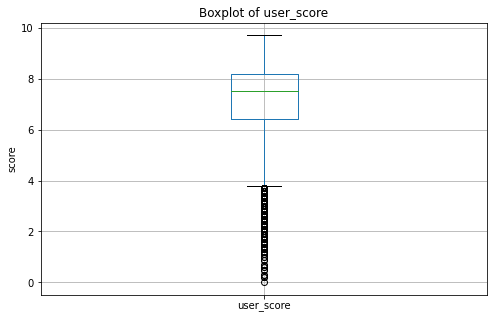

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

El IQR de user_score es 1.799999999999999

La cantidad de valores iguales o menores a 4.600000000000001 es 575

El porcentaje de valores iguales o menores a 4.600000000000001 es 3.44%

EL limite superior es de nuestro boxplot es 9.999999999999998

La cantidad de volores iguales o superiores a 9.999999999999998 es 0

Elporcentaje de valores iguales o superiores a 9.999999999999998 es 0.00%


In [57]:
# Aplicamos nuestra funcion de outliers

outliers(games,'user_score','score')

**Conclusiones**

Al ver los datos de nuestro “.describe” podemos observar que los valores de toda la columna se encuentran entre 4.6 y 9.99 lo cual está bien ya que ese es el rango de calificación de los usuarios. Con esto podemos decir que no tenemos valores atípicos. Sin embargo, podemos ver en nuestro grafico de caja que si tenemos valores fuera de los limites superiores e inferiores. Es un caso muy parecido a nuestro análisis de valores atípicos de la columna `critic_score`. Por lo tanto, no vamos a hacer modificaciones en esta columna tampoco. 

### `Rating`

De nuestro análisis general vimos que en esta columna también tenemos valore ausentes. Vamos a analizar la cantidad de valores ausentes y a buscar una manera en la que podamos reemplazarlos. 

#### Valores Ausentes

In [58]:
# Cantidad de valores ausentes 

len(games[games['rating'].isna()])

6764

In [59]:
# Porcentaje de valores ausentes

'{:.2%}'.format(len(games[games['rating'].isna()])/len(games))

'40.47%'

Podemos ver que al igual que en `critic_score` y `user_score` tenemos una gran cantidad de valores ausentes. 

En este caso podríamos asignar valores según las calificaciones del mismo videojuego. Veamos si esto es posible. 


In [60]:
# Imprimimos una tabla con los valores ausentes de esta columna

games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [61]:
# Tomamos un juego 

games[games['name'] == 'samurai warriors: sanada maru']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14689,samurai warriors: sanada maru,PS4,2016.0,Action,0.0,0.0,0.03,0.0,NaN,NaN,NaN
16323,samurai warriors: sanada maru,PSV,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN


In [62]:
# Tomamos otro juego

games[games['name'] == 'winning post 8 2016']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15599,winning post 8 2016,PS4,2016.0,Simulation,0.0,0.0,0.02,0.0,NaN,NaN,NaN
16714,winning post 8 2016,PSV,2016.0,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,NaN


**Conlusiones**

Como podemos observar, tenemos el mismo escenario que en `critic_score` y `user_score`. Sin embargo, aunque no podamos asignar valores según su clasificación por nombre de videojuego, vamos a asignar clasificaciones por género.  

In [63]:
# Creamos nuestra tabla para hacer el remplazo 

rating_replace = games.pivot_table(index='genre',values='rating',aggfunc=pd.Series.mode)
rating_replace

,rating
genre,
Action,T
Adventure,E
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


In [64]:
# Comprobamos que nuestra función de remplazo funciona aquí

print(replace(games.iloc[9],'rating','genre',rating_replace))
print(replace(games.iloc[4],'rating','genre',rating_replace))
print(replace(games.iloc[10],'rating','genre',rating_replace))



M
T
E


In [65]:
# Hacemos el remplazo

games['rating'] = games.apply(replace,args=('rating','genre',rating_replace),axis=1)

# Comprobamos

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


Perfecto ya no tenemos valores ausentes en esta columna

#### `total_sales`

Para nuestro análisis vamos a necesitar una columna que tenga las ventas totales. Para esto vamos a sumar las ventas de cada región y obtener las ventas totales por cada juego. 

In [66]:
# Creamos la nueva columna
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Comprobamos

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


## Analisis de datos

Ahora que tenemos todas nuestras columnas listas vamos a realizar los siguientes análisis con nuestra tabla.  

-	Cantidad de juegos lanzados por año
-	Ventas por plataforma
-	¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
-	¿Son significativas las diferencias en las ventas por plataforma?
-	¿Las reseñas de usuarios y profesionales afectan las ventas de una plataforma?
-	¿Cómo se diferencias las ventas de un mismo juego entre las diferentes plataformas?
-	Analizar las ventas de juegos por genero
-	Plataformas principales por región
-	Variaciones en las cuotas de mercado de una región a otra
-	Géneros principales por región
-	¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?

### Cantidad de juegos lanzados por año

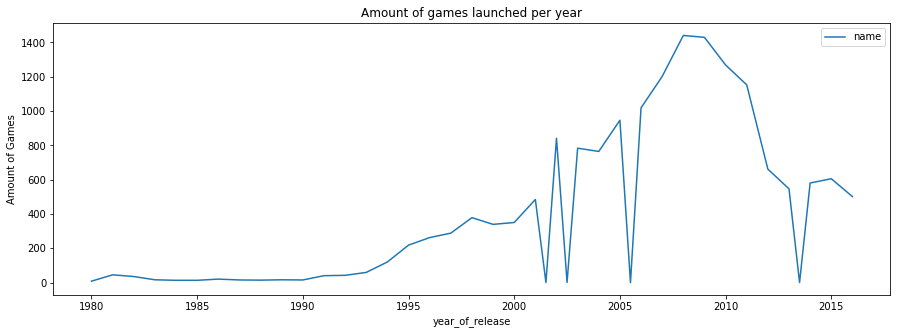

In [67]:
# Creamos un gráfico que nos muestre la cantidad de juegos por año

games.pivot_table(index='year_of_release',values='name',aggfunc='count').plot(  figsize= (15,5))
plt.title('Amount of games launched per year')
plt.ylabel('Amount of Games')
plt.show()

**Observaciones**

De nuestro grafico podemos ver que la cantidad de juegos lanzados al mercado por año ha ido aumento desde 1980. Vemos que la cantidad de juegos lanzados alcanzo su punto más alto alrededor de los años 2007-2008 con un valor por encima de los 1400 juegos, para después tener una caída de juegos lanzados por año. 

**Ventas por año**

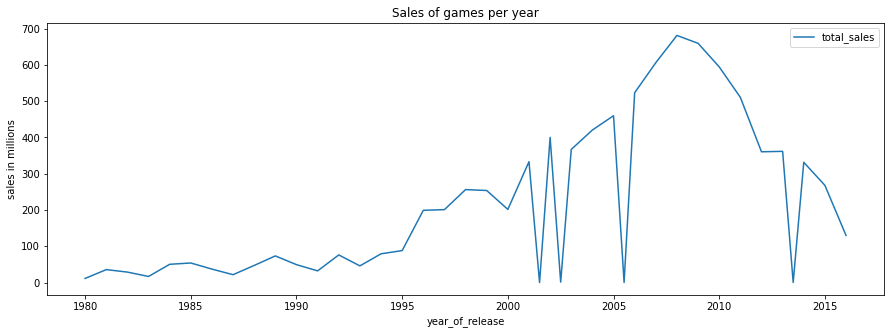

In [68]:
# Creamos un grafico para ver las ventas por año

games.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot(figsize= (15,5))
plt.title('Sales of games per year')
plt.ylabel('sales in millions')
plt.show()

**Observaciones**

Podemos ver que las gráficas de juegos lanzados por año y las ventas por año son bastante similares. Podríamos decir que a medida que aumentaron la cantidad de juegos lanzados también aumento la cantidad de ventas y que a medida que han disminuyo la producción de juegos también ha disminuido la cantidad de ventas recaudadas en juegos por año. 

### Ventas por plataforma

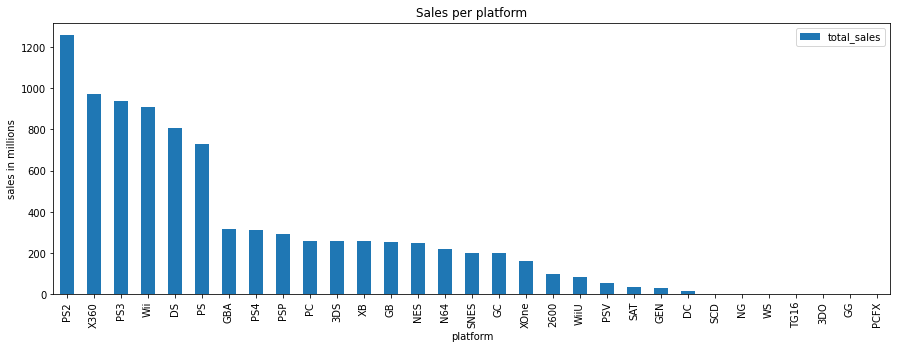

In [69]:
# Creamos una grafica que nos muestre la cantidad de juegos vendidos por plataforma

games.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(
    'total_sales',ascending=False).plot(kind='bar', figsize= (15,5))
plt.title('Sales per platform')
plt.ylabel('sales in millions')
plt.show()

**Observaciones**

Podemos ver claramente que la consola PS2 de Sony es la líder en vetas de juegos hasta el momento con de más de 1200 millones de dólares en ventas. Después de este tenemos a X360 que es una consola de Microsoft con un poco menos de 1000 millones de dólares en ventas. Podríamos destacar que las 6 primeras plataformas del grafico son las líderes en ventas. Después podemos ver cómo va disminuyendo las ventas entre las demás consolas. 

Para nuestros siguientes análisis vamos a seleccionar solo las 4 plataformas con más ventas. En este caso serían la PS2, X360, PS3, y el Nintendo Wii. 

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

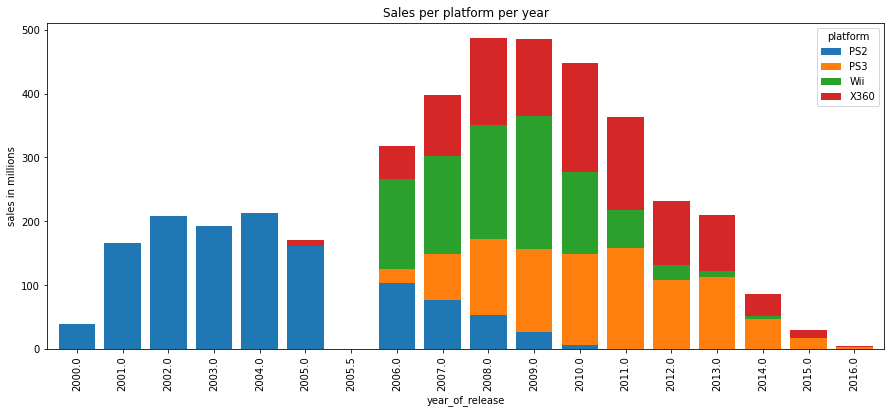

In [70]:
# Creamos una tabla con solo las 4 plataformas con mas ventas

platforms_more_sales = games.loc[games['platform'].isin(['PS2','X360','PS3','Wii'])]

# Creamos un gráfico de ventas por año por cada plataforma

platforms_more_sales.pivot_table(
    index='year_of_release',values='total_sales',aggfunc='sum',columns='platform').plot(
    kind='bar',figsize=(15,6),width=0.8,stacked=True)
plt.title('Sales per platform per year')
plt.ylabel('sales in millions')
plt.show()

**Observaciones**

En esta imagen tenemos las ventas por año de cada una de las 4 plataformas con más ventas. Si tomamos a una de ellas como la PS4 podemos ver que su primer año en ventas fue el año 200. Tuvo su mejor año en venta de videojuegos el 2004 con un poco más de 200 millones y su ultimo año en ventas, o al menos el ultimo que podemos ver en la imagen, sería el año 2011. Tomando a la PS2 como ejemplo podríamos decir que la vida de una consola es de aproximadamente unos 11 años. Si tomamos también al X360 vemos que tiene un periodo similar con el de la PS2. Empieza su recorrido en 2005 con su pico más alto en 2010 y su ultimo pico en 2016. Sin embargo, el Wii comienza su recorrido en 2016 y termina en 2015 y el PS3 comienza en 2006 y termina en 2016. 

### ¿Son significativas las diferencias en las ventas por plataforma?

Para responder esta pregunta, primero vamos a quedarnos solo con los ultimos 5 años. Si queremos predecir el comportamiento del mercado de juegos, debemos analizar los últimos años. 

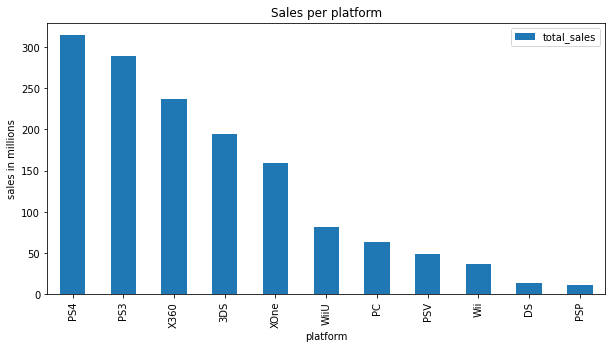

In [71]:
# Creamos una tabla con los años iguales o superiores a 2000

games_final = games.query('year_of_release >= 2012')

# Creamos un grafico de ventas por plataforma con nuestro nueva tabla 

games_final.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(
    'total_sales',ascending=False).plot(kind='bar', figsize= (10,5))
plt.title('Sales per platform')
plt.ylabel('sales in millions')
plt.show()

**Observaciones**

Podemos ver que muchas consolas ya no están en esta nueva tabla. Ya que todas alas que no están son las más antiguas y que ya no están generando ganancias. 

(0.0, 3.0)

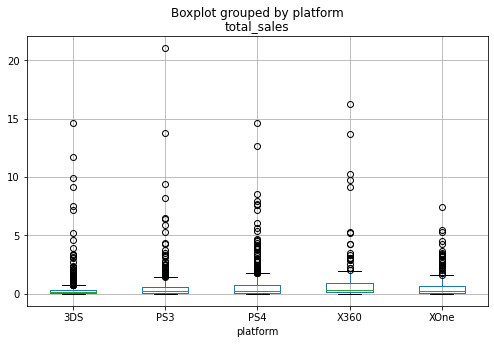

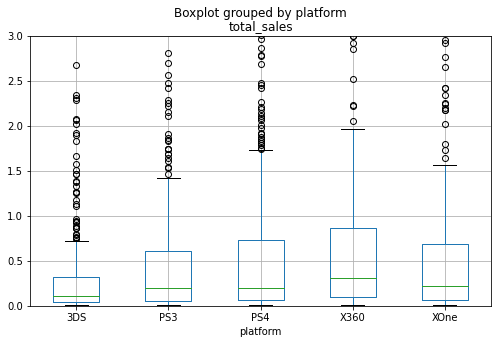

In [72]:
# Creamos diagramas de cajas de las plataformas con más ventas

games_final[games_final['platform'].isin(['PS4','X360','PS3','3DS','XOne'])].boxplot(
    column='total_sales',by='platform',figsize=(8,5))

games_final[games_final['platform'].isin(['PS4','X360','PS3','3DS','XOne'])].boxplot(
    column='total_sales',by='platform',figsize=(8,5))
plt.ylim(0,3)

**Observaciones**

Si nos fijamos solo en las cajas de cada plataforma, podemos ver que la mayoría de las plataformas tienen la mayor cantidad de sus ventas entre 0 y 1 millón de dólares. También podemos ver que las medianas no cambian tanto, pero si tiene diferencias. Vemos que la media ms alto la tiene la X360 y que la PS3, PS2, y XOne tiene medias similres. Así mismo los limites superiores de cada diagrama varían y también tenemos a PS4 y X360 con valores más elevados que los demás.

SI vemos el primer gráfico, vemos que el PS3 ha llegado a vender hasta 20 millones en juegos y que este es el valor más alto entre todos. 

### ¿Las reseñas de usuarios y profesionales afectan las ventas de una plataforma?


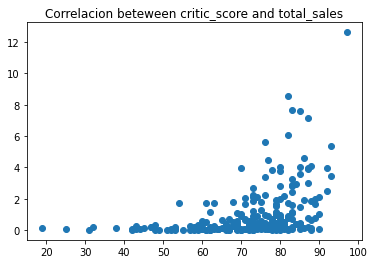

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


In [73]:
# Creamos un diagrama y matriz de correlación para critic_score y total_sales

score_sales = games_final.query('platform == "PS4"')
plt.scatter(score_sales['critic_score'],score_sales['total_sales'])
plt.title('Correlacion beteween critic_score and total_sales')
plt.show()
score_sales[['critic_score','total_sales']].corr()

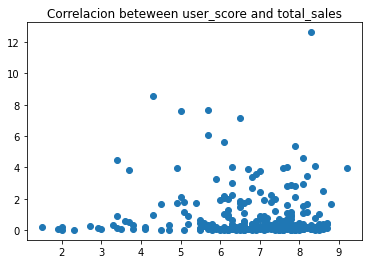

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


In [74]:
# Creamos un diagrama y matriz de correlación para user_score y total_sales

plt.scatter(score_sales['user_score'],score_sales['total_sales'])
plt.title('Correlacion beteween user_score and total_sales')
plt.show()
score_sales[['user_score','total_sales']].corr()

**Observaciones**

Podemos ver que las clasificaciones de los críticos tienen una relación positiva con las ventas de videojuegos. Podemos decir que en cierto modo las criticas si ayudan en la venta de los juegos. Mientras más positivas las críticas, más elevadas serán las ventas de ese juego. Sin embargo, la correlación de las calificaciones de los usuarios es muy débil.

### ¿Cómo se diferencias las ventas de un mismo juego entre las diferentes plataformas?

In [75]:
# Creamos una tabla que nos muestre juegos que se vendan en distintas plataformas. 

games_final.groupby('name')[['platform','total_sales']].nunique().sort_values(
    'total_sales',ascending=False).reset_index().query('platform > 3').head(5)

,name,platform,total_sales
0,lego marvel super heroes,9,9
1,fifa 14,9,9
2,lego the hobbit,8,8
3,fifa soccer 13,8,8
4,fifa 15,8,8


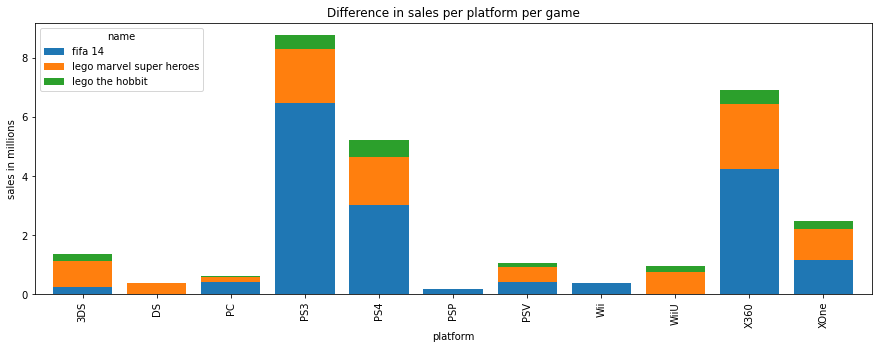

In [76]:
# Creamos una gráfica que muestra las ventas de algunos juegos en sus diferentes plataformas.

games_final.query("name == 'lego marvel super heroes' or name == 'fifa 14' or name == 'lego the hobbit'").pivot_table(
    index='platform',values='total_sales',aggfunc='sum',columns='name').plot(kind='bar',width=0.8,figsize=(15,5),stacked=True)
plt.title('Difference in sales per platform per game')
plt.ylabel('sales in millions')
plt.show()

**Observaciones**

Podemos ver que cada juego tiene su consola donde genera más ingresos. El fifa 14 por ejemplo tuvo más ventas en la PS3 que en las demás plataformas. Y vemos que los otros dos juegos que seleccionamos tiene más ventas en la PS3 tambien. También podemos notar que la mayor venta de cada juego se encuentra en las consolas de Sony y las de Microsoft. Esto podría ser porque son las consolas más compradas en el mercado. 

### Analizar las ventas de juegos por genero

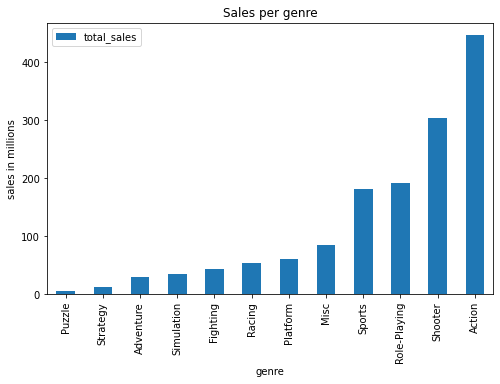

In [77]:
# Creamos una gráfica con las ventas totales por género. 

games_final.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(
    'total_sales').plot(kind='bar',figsize=(8,5))
plt.title('Sales per genre')
plt.ylabel('sales in millions')
plt.show()

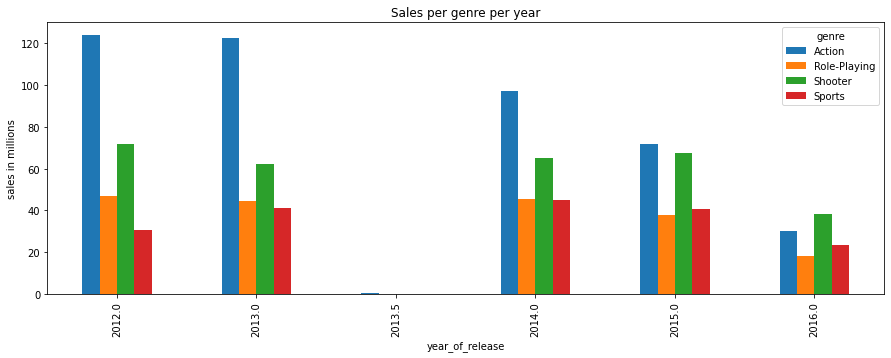

In [78]:
# Tomamos los géneros con más ventas y hacemos un gráfico por año

genre_more_sales = games_final.query('genre == "Action" or genre == "Sports" or genre == "Shooter" or genre == "Role-Playing"')

genre_more_sales.pivot_table(index='year_of_release',values='total_sales',columns='genre',aggfunc='sum').plot(
    kind='bar',figsize=(15,5))
plt.title('Sales per genre per year')
plt.ylabel('sales in millions')
plt.show()

**Observaciones**

Podemos ver claramente que en términos generales el género que más ha recaudado en los últimos 5 años ha sido los videojuegos de acción. Siendo los de deportes, disparos, y role-play los siguientes en la lista. 

Toamos estos cuatro géneros y creamos un gráfico para ver sus ventas por año. Efectivamente vemos que en la mayoría de los años los juegos de acción fueron los líderes en ventas. También vemos que el ultimo año, el año 2016, los juegos de disparos fueron los que recaudaron más. Podríamos decir que los juegos de acción siempre han sido los más populares y más venidos en los últimos 5 años. 

### Plataformas principales por región


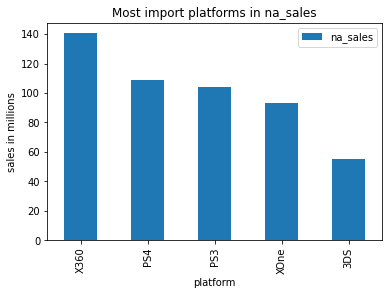

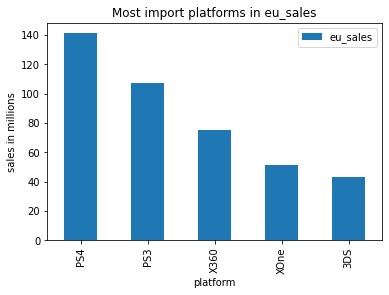

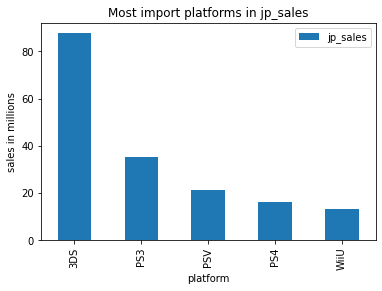

In [79]:
# Creamos gráficos para cada región y sus plataformas principales. 

regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    games_final.pivot_table(index='platform',values=region,aggfunc='sum').sort_values(
        region,ascending=False).head(5).plot(kind='bar')

    plt.title(f'Most import platforms in {region}')
    plt.ylabel('sales in millions')

**Observaciones**

Podemos ver que tanto en Estados Unidos como en Europa tenemos las mismas plataformas como más importantes, aunque tenemos las plataformas en un orden de importancia diferente. La plataforma principal en Estados Unidos es el X360 y en Europa es la PS4. Sin embargo, en Japón vemos que las plataformas de Nintendo son más importantes. Podemos ver que el X360 no está y que el Nintendo 3DS es la plataforma principal. 

Algo importante a destacar es la presencia de las consolas de Sony en cada región ocupando siempre el primer o segundo puesto con su PS4 o PS3. 

### Variaciones en las cuotas de mercado de una región a otra

Las ventas totales en na_sales son 593.3
El porcentaje de ventas en na_sales con respecto a las ventas globales es de 40.86%

Las ventas totales en eu_sales son 509.18
El porcentaje de ventas en eu_sales con respecto a las ventas globales es de 35.07%

Las ventas totales en jp_sales son 192.82000000000002
El porcentaje de ventas en jp_sales con respecto a las ventas globales es de 13.28%



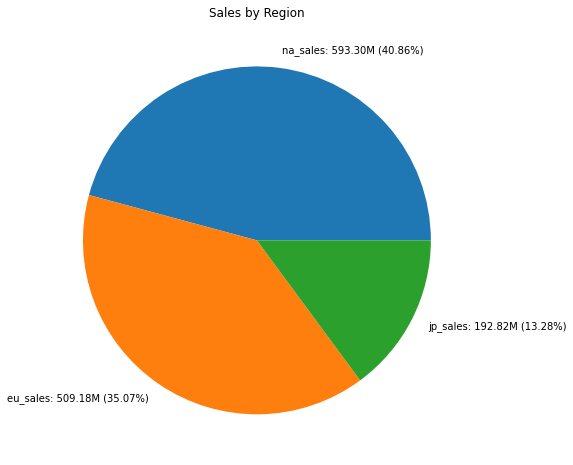

In [80]:
# Creamos una gráfica que nos muestre la variación de cuota del mercado de región a región. 

total_sales_region = []
percetages_region = []

for region in regions:
    total_sales = games_final[region].sum()
    percentages = '{:.2%}'.format(games_final[region].sum()/ games_final['total_sales'].sum())

    total_sales_region.append(total_sales)
    percetages_region.append(percentages)

    print(f'Las ventas totales en {region} son {total_sales}')
    print(f'El porcentaje de ventas en {region} con respecto a las ventas globales es de {percentages}')
    print()

labels = [f'{region}: {sales:.2f}M ({percentage})' for region, sales, percentage in zip(regions, total_sales_region, percetages_region)]
fig, pie_chart = plt.subplots(figsize=(10, 8))
pie_chart.pie(total_sales_region,labels=labels)
pie_chart.set_title('Sales by Region')
plt.show()

**Observaciones**

En este grafico podemos observar que Norte América es el líder en vetas de videojuegos con un 40.86% del total del mercado, seguido por Europa con un 35.07%, y al último tenemos a Japón con un 13.28%. El otro 10.79% se divide en las demás regiones. 

### Géneros principales por región

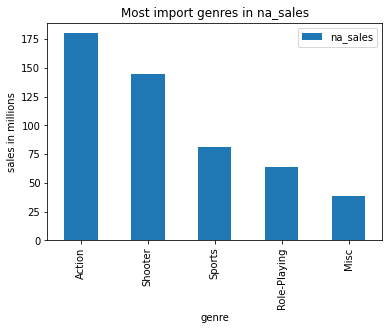

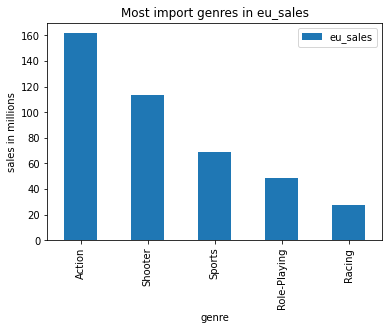

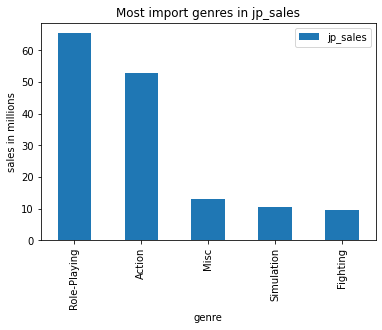

In [81]:
# Creamos gráficos de géneros por región

regions = ['na_sales','eu_sales','jp_sales']

for region in regions:
    games_final.pivot_table(index='genre',values=region,aggfunc='sum').sort_values(
        region,ascending=False).head(5).plot(kind='bar')

    plt.title(f'Most import genres in {region}')
    plt.ylabel('sales in millions')

**Observaciones**

Podemos ver que los gustos de acuerdo a genero de juegos es bastante similar entre Norte América y Europa. Tiene los mimos géneros y en el mismo orden excepto por uno. Ambos tienen los géneros de acción, disparos, deportes, y role-play; siendo el de acción el número uno. Sin embargo, Japón tiene gustos un poco diferentes. EL género más jugado es el role-play seguido por acción y misc. Algo a resaltar es que en las tres regiones los juegos más jugados son los de acción y deportes. 

### ¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?

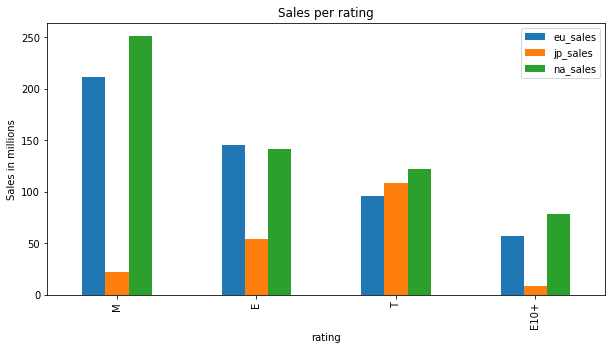

In [82]:
# Creamos un gráfico con la relación de precio y clasificación esrb

data = games_final.pivot_table(index='rating', values=regions, aggfunc='sum').sort_values(regions, ascending=False)

data.plot(kind='bar',figsize=(10,5))

plt.title('Sales per rating')
plt.ylabel('Sales in millions')

plt.show()

**Observaciones**

En nuestro grafico podemos observar que ciertas clasificaciones si recaudan más que otras. Por ejemplo, la clasificación M es la que más genera en Norte America y Europa. Para Europa y Norte América siguen la E, T, y E10+. Y para Japón la que mas genera es la clasificacion T, seguidas por la E, M, y la E+10, en ese orden.

## Prueba de hipótesis

En esta sección vamos a hacer la prueba de las siguientes hipótesis:

-	Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
-	Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Primera hipótesis

$H_O$ = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las iguales

$H_a$ = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las diferentes

 &#945; = 0.05

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


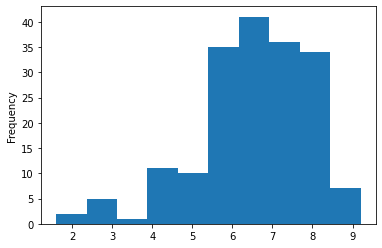

In [83]:
# Shapiro test para saber si la distribucion de cada uno es normal 

test_stat_normality, p_value_normality = st.shapiro(games_final.query("platform == 'XOne'")['user_score'].dropna())

print("p value:%.4f" % p_value_normality)

if p_value_normality <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
    
# Creamos un gráfico para mostrar la distribución

games_final.query("platform == 'XOne'")['user_score'].plot(kind='hist')
plt.show()

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


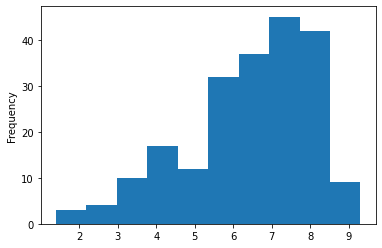

In [84]:
# Shapiro test para saber si la distribucion de cada uno es normal 

test_stat_normality, p_value_normality=st.shapiro(games_final.query("platform == 'PC'")['user_score'].dropna())

print("p value:%.4f" % p_value_normality)

if p_value_normality <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
    
# Creamos un gráfico para mostrar la distribución

games_final.query("platform == 'PC'")['user_score'].plot(kind='hist')
plt.show()

**Observaciones**

Vemos que ambas distribuciones no son normales por tanto necesitamos hacer el mannwhitneyu test.

In [85]:
# Hacemos la prueba

alpha = 0.05

results = st.mannwhitneyu(games_final.query("platform == 'XOne'")['user_score'].dropna(),
                       games_final.query("platform == 'PC'")['user_score'].dropna())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.7992357678646063
No rechazamos la hipótesis nula


**Conclusiones**

Ya que nuestro p-value es mayor que nuestro nivel de significancia, podemos decir que notenemos suficiente evidencia para rechazar la hipótesis nula y decir que “Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.”

### Segunda hipótesis

$H_O$ = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

$H_a$ = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

 &#945; = 0.05

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


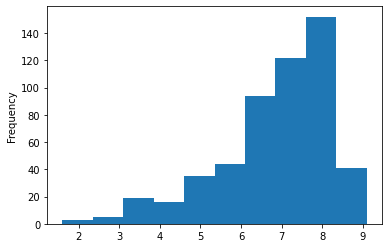

In [86]:
# Shapiro test para saber si la distribucion de cada uno es normal 

test_stat_normality, p_value_normality = st.shapiro(games_final.query("genre == 'Action'")['user_score'].dropna())

print("p value:%.4f" % p_value_normality)

if p_value_normality <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
    
# Creamos un gráfico para mostrar la distribución

games_final.query("genre == 'Action'")['user_score'].plot(kind='hist')
plt.show()

p value:0.0003
Reject null hypothesis >> The data is not normally distributed


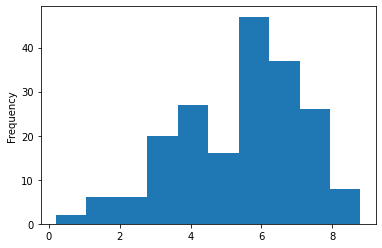

In [87]:
# Shapiro test para saber si la distribucion de cada uno es normal 

test_stat_normality, p_value_normality = st.shapiro(games_final.query("genre == 'Sports'")['user_score'].dropna())

print("p value:%.4f" % p_value_normality)

if p_value_normality <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")
    
# Creamos un gráfico para mostrar la distribución

games_final.query("genre == 'Sports'")['user_score'].plot(kind='hist')
plt.show()

**Observaciones**

Vemos que ambas distribuciones no son normales por tanto necesitamos hacer el mannwhitneyu test.

In [88]:
# Hacemos la prueba

alpha = 0.05

results = st.mannwhitneyu(games_final.query("genre == 'Action'")['user_score'].dropna(),
                       games_final.query("genre == 'Sports'")['user_score'].dropna())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 5.197053219468525e-24
Rechazamos la hipótesis nula


**Conclusiones**

Ya que nuestro p-value es menor que nuestro nivel de significancia, podemos decir que no tenemos suficiente evidencia para rechazar la hipótesis nula y decir que “Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son differenes.”

## Conclusiones Generales

**Preparación de datos**

Encontramos dos filas con valores ausentes en la columna `name` y decidimos deshacernos de ellas.

Encontramos valores ausentes en la columna `years_of_release` y decidimos reemplazarlos con una tabla de años según el lanzamiento del mismo juego en una consola diferente. Esto no soluciono todo el problema, pero ayudo a disminuir la cantidad de valores ausentes. 

Encontramos valores atípicos en la columna `year_of_release` pero decidimos no hacer nada con ellos. 

Encontramos valores atípicos también en cada columna de ventas de cada región. Sin embargo, decidimos no hacer cambios a estos valores ya que nos servirían para nuestro análisis final. 

Encontramos valores ausentes en las columnas `critic_score` y `user_score` y rellenamos esos valores con una tabla segmentada de género y ventas.

También encontramos valores atípicos en estas columnas, pero tampoco hicimos cambios. 

Decidimos no hacer cambios en la columna rating ya que no teníamos la información suficiente para poder llenar los valores ausentes. 

**Análisis de datos**

**Cantidad de juegos lanzados por año**

Los juegos lanzados por año han ido en aumento desde 1980. Llegaron a su punto más ato alrededor de 2008 y desde entonces ha disminuido la cantidad de juegos lanzados al mercado por año. 

También vimos que las ventas tuvieron una gráfica parecida. AL subir la cantidad de juegos en el mercado también aumentaban las ventas por año y al disminuir los juegos por año también disminuían las ventas. 

**Ventas por plataforma**

Las plataformas líderes en ventas son la PS2, X360, PS3, Wii, y DS. 

**¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

Plataformas como la PS2 y X360 mostraron una vida de aproximadamente 10 años. Teniendo su punto más alto en el año 5 de su lanzamiento. Otras plataformas tenían tiempos más cortos de 9 años aproximadamente. 

**¿Son significativas las diferencias en las ventas por plataforma?**

Para esta parte decidimos quedarnos solo con los años iguales o superiores al 2012. 

Vimos en nuestro diagrama de cajas de las diferencias no son tan grandes. La mayoría de ventas de las plataformas más populares estaban entre 0 y 1 millón de dólares. Sin embargo, vemos que si tenemos diferencias de las medianas de las ventas de cada plataforma. Podemos ver que las consolas con las medianas más altas son el X360 y la PS4. También vemos diferencias en sus límites superiores. 

**¿Las reseñas de usuarios y profesionales afectan las ventas de una plataforma?**

Encontramos que las correlaciones de los puntajes puestos por críticos si afectan de una manera las ventas de juegos. Los puntajes de los usuarions tienen una relación muy debil. 

**¿Cómo se diferencias las ventas de un mismo juego entre las diferentes plataformas?**

Un juego puede venderse para diferentes consolas pero siempre tendrá mayores ventas en una de ellas. 

Las plataformas con mayores ventas de juegos son las de la empresa Sony.

**Analizar las ventas de juegos por genero**

En los últimos 5 años los juegos de acción han sido los que más dinero han recadado; seguido por los juegos de deportes, disparos, y role-play. 

En los últimos tres años los juegos de disparos han tomado más fuerza y han logrado vender más. Incluso superando las ventas de juegos de acción en el último año. 

**Plataformas principales por región**

En Norte América y Europa tenemos las mismas plataformas con más ventas solo que un orden diferente. En norte América tenemos al X360 como la plataforma principal y en Europa a la PS4 como plataforma principal. 

En Japón vemos más consolas de la empresa Nintendo como principales. Aquí la consola principal es el Nintendo 3DS. 

Podemos ver que la presencia de las consolas de Sony es importante en cada región. 

**Variaciones en las cuotas de mercado de una región a otra**

Norte América tiene la mayor cantidad de las ventas del mercado con un 40.86%. Europa es el segundo con 35.07%. Y Japón es el tercero con 13.28%.

**Géneros principales por región**

Los géneros preferidos por las personas de Norte América y Europa son bastante similares. Los juegos de acción son los principales en ventas en ambas regiones. 

En Japón los juegos con más ventas son los de role-play. 

Vemos que los juegos de acción forman parte importante en las tres regiones. 

**¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?**

Los juegos con clasificación M son los que más ingresos generan, seguidos por la clasificas E, T, y E10+. 

Podríamos decir que la clasificación si afecta en la venta de juegos. 

**Prueba de hipótesis**

**Primera hipótesis**

Ya que nuestro p-value es mayor que nuestro nivel de significancia, podemos decir que notenemos suficiente evidencia para rechazar la hipótesis nula y decir que “Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.”

**Segunda hipótesis**

Ya que nuestro p-value es menor que nuestro nivel de significancia, podemos decir queno tenemos suficiente evidencia para rechazar la hipótesis nula y decir que “Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son differenes.”
